In [ ]:
import tensorflow as tf

print(tf.__version__)

2.8.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
(X_train, y_train), (X_test, y_test) =  tf.keras.datasets.cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = y_train.flatten()
y_test = y_test.flatten()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

170508288/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000,), (10000,))

In [ ]:
K = len(set(y_train))

print('Número de classes:', K)

Número de classes: 10


In [ ]:
i = Input(shape=(32,32,3))

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024)(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(X_train, 
              y_train,
              epochs=20,
              validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 32s 20ms/step - loss: 2.4849 - accuracy: 0.4436 - val_loss: 1.3751 - val_accuracy: 0.5393
Epoch 2/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0610 - accuracy: 0.6345 - val_loss: 1.1823 - val_accuracy: 0.6144
Epoch 3/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8517 - accuracy: 0.7112 - val_loss: 0.8422 - val_accuracy: 0.7131
Epoch 4/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6995 - accuracy: 0.7614 - val_loss: 0.8176 - val_accuracy: 0.7282
Epoch 5/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5939 - accuracy: 0.7937 - val_loss: 0.7074 - val_accuracy: 0.7598
Epoch 6/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.5036 - accuracy: 0.8253 - val_loss: 0.7222 - val_accuracy: 0.7602
Epoch 7/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.4389 - accuracy: 0.8470 - val_loss: 0.7267 -

In [ ]:
batch_size = 32

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

h = model.fit(train_generator, validation_data=(X_test, y_test), epochs=50, steps_per_epoch=steps_per_epoch, initial_epoch=20)

Epoch 21/50
1562/1562 [==============================] - 53s 34ms/step - loss: 0.3043 - accuracy: 0.8956 - val_loss: 0.4819 - val_accuracy: 0.8588
Epoch 22/50
1562/1562 [==============================] - 52s 34ms/step - loss: 0.3023 - accuracy: 0.8958 - val_loss: 0.4789 - val_accuracy: 0.8542
Epoch 23/50
1562/1562 [==============================] - 52s 33ms/step - loss: 0.3008 - accuracy: 0.8958 - val_loss: 0.4775 - val_accuracy: 0.8525
Epoch 24/50
1562/1562 [==============================] - 52s 34ms/step - loss: 0.2958 - accuracy: 0.8989 - val_loss: 0.4382 - val_accuracy: 0.8663
Epoch 25/50
1562/1562 [==============================] - 53s 34ms/step - loss: 0.2980 - accuracy: 0.8972 - val_loss: 0.4380 - val_accuracy: 0.8662
Epoch 26/50
1562/1562 [==============================] - 53s 34ms/step - loss: 0.2879 - accuracy: 0.9001 - val_loss: 0.4513 - val_accuracy: 0.8637
Epoch 27/50
1562/1562 [==============================] - 53s 34ms/step - loss: 0.2829 - accuracy: 0.9027 - val_loss: 0

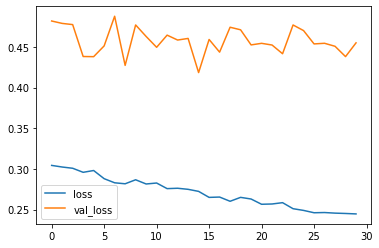

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()

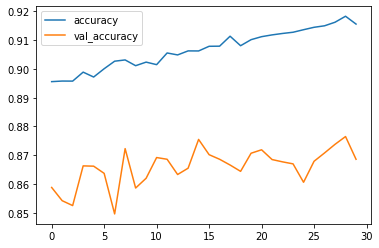

In [ ]:
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix

preds_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(preds_test, y_test)

In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'Predict label: horse True label: deer')

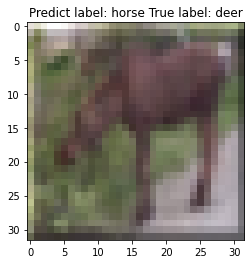

In [ ]:
missclassified_idx = np.where(preds_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'Predict label: {labels[preds_test[i]]} True label: {labels[y_test[i]]}')